# **BDM-3035 Big Data Capstone Project**
Instructor: Meysam Effati

Members:


*   Ann Margaret Silva (C0903604)
*   Antonio Carlos De Mello Mendes (C0866063)

*   Maria Jessa Cruz (C0910329)
*   Prescila Mora (C0896891)


*   Rewant Sharma (C0894265)



Datasets:

*https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi*

*https://cwfis.cfs.nrcan.gc.ca/background/summary/fbp*


# **Wildfire Prediction Data**

In [53]:
%pip install scikit-learn

# Import Libraries

import os
from pymongo import MongoClient
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from sklearn.preprocessing import StandardScaler, OneHotEncoder

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
# Load environment variables from the .env file
dotenv_path = r'C:\Users\mariajessa\OneDrive - Lambton College\2024S\Capstone Project\WildFireSimulation\mongodb.env'
load_dotenv(dotenv_path)

True

In [55]:
# Define environment variables
db_name = 'wildfire_db_2020_2023'
mongo_uri = os.getenv("MONGO_URI")

In [56]:
# Connect to MongoDB
client = MongoClient(mongo_uri)
db = client[db_name]


C:\Users\mariajessa\AppData\Local\Temp\ipykernel_24392\850589222.py:2: UserWarning: You appear to be connected to a CosmosDB cluster. For more information regarding feature compatibility and support please visit https://www.mongodb.com/supportability/cosmosdb
  client = MongoClient(mongo_uri)


Load the Data

In [57]:
# Load data from MongoDB
wildfire_cleandata = db['wildfire_cleaned_data']
geo_wfp = pd.DataFrame(list(wildfire_cleandata.find()))

In [58]:
geo_wfp

,_id,lat,lon,rep_date,source,sensor,satellite,agency,temp,rh,...,cfb,pcuring,greenup,elev,sfl,cfl,tfc0,ecozone,sfc0,geometry
0,6669b15b44a41007063ba9da,62.116300,-161.826000,2020/06/02 12:54:00.000,NASA4,IBAND,S-NPP,UAK,15.917000,69,...,0.0,50.0,1.0,90,1.011450,0.000000,0.35,2,0.35,"{'type': 'Point', 'coordinates': [-161.826, 62..."
1,6669b15e44a41007063ba9db,61.629100,-164.449000,2020/06/11 12:36:00.000,NASA5,IBAND,NOAA-20,UAK,26.064000,52,...,0.0,50.0,1.0,24,0.435360,0.000000,0.10,2,0.10,"{'type': 'Point', 'coordinates': [-164.449, 61..."
2,6669b15e44a41007063ba9dc,47.474000,-69.938000,2020/06/20 06:30:00.000,USFS,IBAND,JPSS1,QC,24.666000,54,...,0.0,29.0,1.0,27,-1.000000,0.000000,1.36,,1.36,"{'type': 'Point', 'coordinates': [-69.938, 47...."
3,6669b15e44a41007063ba9dd,32.392000,-110.804000,2020/06/22 08:24:00.000,NASA6,IBAND,S-NPP,UAZ,32.754000,11,...,0.0,50.0,1.0,1534,0.212800,0.000530,0.35,12,0.35,"{'type': 'Point', 'coordinates': [-110.804, 32..."
4,6669b15e44a41007063ba9de,33.472000,-91.333200,2020/06/13 07:06:00.000,NASA7,IBAND,NOAA-20,UAR,31.359000,37,...,0.0,50.0,1.0,38,0.102444,0.000499,0.35,8,0.35,"{'type': 'Point', 'coordinates': [-91.3332, 33..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450337,6670e69da6dc531d5ed14328,56.340000,-119.229897,2023/05/13 21:29:00.000,NASA,MODIS,Aqua,AB,25.278999,25,...,62.0,NaN,NaN,640,5.329375,0.032534,2.44,9,2.19,"{'type': 'Point', 'coordinates': [-119.229897,..."
450338,6670e69ea6dc531d5ed14329,31.086281,-98.919960,2023/03/26 07:58:00.000,NASA7,VIIRS-I,NOAA-20,UTX,21.538000,18,...,0.0,100.0,0.0,472,0.242550,0.008307,0.35,9,0.35,"{'type': 'Point', 'coordinates': [-98.91996, 3..."
450339,6670e69ea6dc531d5ed1432a,56.339291,-119.209106,2023/05/13 21:29:00.000,NASA,MODIS,Aqua,AB,25.422001,25,...,80.0,NaN,NaN,624,8.216022,0.217550,2.52,9,2.20,"{'type': 'Point', 'coordinates': [-119.209106,..."
450340,6670e69ea6dc531d5ed1432b,56.049808,-116.394592,2023/05/13 08:43:00.000,NASA2,VIIRS-I,S-NPP,AB,25.267000,24,...,73.0,NaN,NaN,733,17.867018,0.162315,2.38,9,2.00,"{'type': 'Point', 'coordinates': [-116.394592,..."


In [59]:
print("\nDescribe the GeoDataFrame:")
geo_wfp.describe()


Describe the GeoDataFrame:


,lat,lon,temp,rh,ws,wd,pcp,ffmc,dmc,dc,...,bfc,hfi,cfb,pcuring,greenup,elev,sfl,cfl,tfc0,sfc0
count,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,450342.000000,...,2.391320e+05,450339.000000,450339.000000,425990.000000,425990.00000,450342.000000,450342.000000,450342.000000,450339.000000,450339.000000
mean,47.087916,-110.010441,23.058456,36.686720,13.956673,196.807948,0.534137,89.126303,95.263200,417.016640,...,1.008699e+02,6332.695520,31.308437,49.936846,0.72128,701.436197,9.556830,0.371298,2.151030,1.878887
std,11.865684,18.039074,7.093647,15.424503,5.922645,95.635528,2.785133,7.647873,97.460619,275.853409,...,1.782908e+04,10020.813765,40.854987,31.819724,0.44837,657.176444,15.913778,0.620658,1.849023,1.547191
min,25.000200,-165.826004,-45.268002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.00000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,36.105900,-120.730756,19.127000,26.000000,9.661250,135.000000,0.000000,87.086998,34.110250,214.916752,...,3.500000e-01,253.000000,0.000000,25.000000,0.00000,264.000000,0.569385,0.001207,0.350000,0.350000
50%,50.065950,-110.498692,23.712999,35.000000,12.803000,210.000000,0.002000,90.649002,68.554001,381.701996,...,1.419560e+00,2359.000000,0.000000,50.000000,1.00000,424.000000,4.648921,0.241934,1.660000,1.440000
75%,56.220001,-96.537003,27.944000,46.000000,16.996000,271.000000,0.122000,93.303001,112.562752,546.989990,...,4.627730e+00,8987.000000,78.000000,75.000000,1.00000,1021.000000,14.686516,0.601541,3.650000,3.250000
max,70.558000,-52.985000,48.426000,99.000000,93.580002,360.000000,96.686000,99.000000,909.347000,2707.040000,...,5.890072e+06,236169.000000,100.000000,100.000000,1.00000,3558.000000,99.984642,6.878477,15.850000,15.850000


In [60]:
# Check for missing values
print("\nMissing values in the GeoDataFrame:")
print(geo_wfp.isnull().sum())


Missing values in the GeoDataFrame:
_id               0
lat               0
lon               0
rep_date          0
source            0
sensor            0
satellite         0
agency            0
temp              0
rh                0
ws                0
wd                0
pcp               0
ffmc              0
dmc               0
dc                0
isi               0
bui               0
fwi               0
fuel              0
ros               3
sfc               3
tfc               3
bfc          211210
hfi               3
cfb               3
pcuring       24352
greenup       24352
elev              0
sfl               0
cfl               0
tfc0              3
ecozone           0
sfc0              3
geometry          0
dtype: int64


In [61]:
geo_wfp.drop(columns=['geometry'], inplace=True)
geo_wfp.duplicated().sum()

np.int64(0)

Feature Engineering

In [62]:
# Ensuring 'rep_date' is in datetime format is essential to generating time-based features
geo_wfp['rep_date'] = pd.to_datetime(geo_wfp['rep_date'])

In [63]:
# Generate time-based features
geo_wfp['year'] = geo_wfp['rep_date'].dt.year
geo_wfp['month'] = geo_wfp['rep_date'].dt.month
geo_wfp['day'] = geo_wfp['rep_date'].dt.day
geo_wfp['dayofweek'] = geo_wfp['rep_date'].dt.dayofweek
geo_wfp['weekofyear'] = geo_wfp['rep_date'].dt.isocalendar().week

In [64]:
# Drop unnecessary columns
columns_to_drop = ['_id', 'rep_date', 'source', 'sensor', 'satellite']
geo_wfp.drop(columns=columns_to_drop, inplace=True)

In [65]:
# Encode categorical variables
categorical_cols = ['fuel', 'ecozone']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(geo_wfp[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
geo_wfp = pd.concat([geo_wfp.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
geo_wfp.drop(columns=categorical_cols, inplace=True)

In [66]:
# Lag features are previous values of the target variable that help in capturing temporal dependencies and will be used as predictors in time series forecasting.
geo_wfp['cfb_lag1'] = geo_wfp['cfb'].shift(1)
geo_wfp['cfb_lag2'] = geo_wfp['cfb'].shift(2)
geo_wfp['cfb_lag3'] = geo_wfp['cfb'].shift(3)

In [67]:
# Get the rolling statistics, mean and standard deviation, over a window (e.g., 7 days, 30 days)  to capture trends and seasonality in the data.
geo_wfp['cfb_roll_mean_7'] = geo_wfp['cfb'].rolling(window=7).mean()
geo_wfp['cfb_roll_std_7'] = geo_wfp['cfb'].rolling(window=7).std()
geo_wfp['cfb_roll_mean_30'] = geo_wfp['cfb'].rolling(window=30).mean()
geo_wfp['cfb_roll_std_30'] = geo_wfp['cfb'].rolling(window=30).std()

In [68]:
# Interaction features like 'temp_rh_interaction' capture the combined effect of multiple variables which might be more informative than the individual features.
geo_wfp['temp_rh_interaction'] = geo_wfp['temp'] * geo_wfp['rh']

In [69]:
# Normalize features to ensure that each feature contributes equally

features_to_scale = ['temp', 'rh', 'ws', 'cfb_lag1', 'cfb_lag2', 'cfb_lag3', 
                     'cfb_roll_mean_7', 'cfb_roll_std_7', 'cfb_roll_mean_30', 
                     'cfb_roll_std_30', 'temp_rh_interaction']

scaler = StandardScaler()
geo_wfp[features_to_scale] = scaler.fit_transform(geo_wfp[features_to_scale])

In [70]:
# Transform longitude and latitude into sine and cosine components for cyclical encoding
geo_wfp['lat_sin'] = np.sin(np.radians(geo_wfp['lat']))
geo_wfp['lat_cos'] = np.cos(np.radians(geo_wfp['lat']))
geo_wfp['lon_sin'] = np.sin(np.radians(geo_wfp['lon']))
geo_wfp['lon_cos'] = np.cos(np.radians(geo_wfp['lon']))


In [71]:
# Drop original longitude and latitude columns
geo_wfp.drop(columns=['lat', 'lon'], inplace=True)

In [72]:
# Convert to GeoDataFrame
geo_wfp = gpd.GeoDataFrame(geo_wfp, geometry=gpd.points_from_xy(geo_wfp['lon_cos'], geo_wfp['lat_cos']))
geo_wfp.set_crs(epsg=4326, inplace=True)

,agency,temp,rh,ws,wd,pcp,ffmc,dmc,dc,isi,...,cfb_roll_mean_7,cfb_roll_std_7,cfb_roll_mean_30,cfb_roll_std_30,temp_rh_interaction,lat_sin,lat_cos,lon_sin,lon_cos,geometry
0,UAK,-1.006741,2.094934,-0.649149,320,0.430,82.976000,30.078000,161.161000,2.680000,...,NaN,NaN,NaN,NaN,0.750069,0.883899,0.467678,-0.311904,-0.950114,POINT (-0.95011 0.46768)
1,UAK,0.423696,0.992790,-0.700308,145,1.237,68.466000,0.000000,294.020000,0.977000,...,NaN,NaN,NaN,NaN,1.412690,0.879890,0.475177,-0.268096,-0.963392,POINT (-0.96339 0.47518)
2,QC,0.226618,1.122454,-0.867970,30,0.591,88.685000,55.743000,202.448000,5.536000,...,NaN,NaN,NaN,NaN,1.352464,0.736971,0.675925,-0.939322,0.343037,POINT (0.34304 0.67592)
3,UAZ,1.366794,-1.665321,-0.843150,271,0.000,98.652000,290.568000,841.230000,22.181000,...,NaN,NaN,NaN,NaN,-1.152252,0.535709,0.844403,-0.934801,-0.355172,POINT (-0.35517 0.84440)
4,UAR,1.170139,0.020311,-0.000958,50,0.001,91.660000,18.664000,102.620000,10.972000,...,NaN,NaN,NaN,NaN,0.909915,0.551529,0.834155,-0.999729,-0.023267,POINT (-0.02327 0.83416)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450337,AB,0.313033,-0.757673,-0.038272,256,0.004,92.876000,62.764999,366.980988,12.881000,...,-0.429065,0.334625,-1.203030,-1.056049,-0.451928,0.832341,0.554263,-0.872667,-0.488315,POINT (-0.48832 0.55426)
450338,UTX,-0.214341,-1.211497,1.106488,350,0.000,92.271004,35.762001,391.644012,16.648001,...,-0.429065,0.334625,-1.203030,-1.056049,-1.081648,0.516328,0.856391,-0.987906,-0.155055,POINT (-0.15505 0.85639)
450339,AB,0.333192,-0.757673,-0.039454,256,0.004,92.898003,63.286999,370.382996,12.916000,...,0.004527,0.616922,-1.082633,-0.713258,-0.442712,0.832334,0.554274,-0.872845,-0.487998,POINT (-0.48800 0.55427)
450340,AB,0.311341,-0.822505,-0.453628,202,0.090,92.988998,39.889000,329.694000,11.561000,...,0.400181,0.614512,-0.972770,-0.496713,-0.517833,0.829523,0.558472,-0.895754,-0.444551,POINT (-0.44455 0.55847)


In [73]:
geo_wfp.head()

,agency,temp,rh,ws,wd,pcp,ffmc,dmc,dc,isi,...,cfb_roll_mean_7,cfb_roll_std_7,cfb_roll_mean_30,cfb_roll_std_30,temp_rh_interaction,lat_sin,lat_cos,lon_sin,lon_cos,geometry
0,UAK,-1.006741,2.094934,-0.649149,320,0.430,82.976,30.078,161.161,2.680,...,NaN,NaN,NaN,NaN,0.750069,0.883899,0.467678,-0.311904,-0.950114,POINT (-0.95011 0.46768)
1,UAK,0.423696,0.992790,-0.700308,145,1.237,68.466,0.000,294.020,0.977,...,NaN,NaN,NaN,NaN,1.412690,0.879890,0.475177,-0.268096,-0.963392,POINT (-0.96339 0.47518)
2,QC,0.226618,1.122454,-0.867970,30,0.591,88.685,55.743,202.448,5.536,...,NaN,NaN,NaN,NaN,1.352464,0.736971,0.675925,-0.939322,0.343037,POINT (0.34304 0.67592)
3,UAZ,1.366794,-1.665321,-0.843150,271,0.000,98.652,290.568,841.230,22.181,...,NaN,NaN,NaN,NaN,-1.152252,0.535709,0.844403,-0.934801,-0.355172,POINT (-0.35517 0.84440)
4,UAR,1.170139,0.020311,-0.000958,50,0.001,91.660,18.664,102.620,10.972,...,NaN,NaN,NaN,NaN,0.909915,0.551529,0.834155,-0.999729,-0.023267,POINT (-0.02327 0.83416)


In [74]:
geo_wfp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 450342 entries, 0 to 450341
Data columns (total 91 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   agency               450342 non-null  object  
 1   temp                 450342 non-null  float64 
 2   rh                   450342 non-null  float64 
 3   ws                   450342 non-null  float64 
 4   wd                   450342 non-null  int64   
 5   pcp                  450342 non-null  float64 
 6   ffmc                 450342 non-null  float64 
 7   dmc                  450342 non-null  float64 
 8   dc                   450342 non-null  float64 
 9   isi                  450342 non-null  float64 
 10  bui                  450342 non-null  float64 
 11  fwi                  450342 non-null  float64 
 12  ros                  450339 non-null  float64 
 13  sfc                  450339 non-null  float64 
 14  tfc                  450339 non-null  float6

In [75]:
print(geo_wfp.columns)

Index(['agency', 'temp', 'rh', 'ws', 'wd', 'pcp', 'ffmc', 'dmc', 'dc', 'isi',
       'bui', 'fwi', 'ros', 'sfc', 'tfc', 'bfc', 'hfi', 'cfb', 'pcuring',
       'greenup', 'elev', 'sfl', 'cfl', 'tfc0', 'sfc0', 'year', 'month', 'day',
       'dayofweek', 'weekofyear', 'fuel_C2', 'fuel_C3', 'fuel_C4', 'fuel_C5',
       'fuel_C6', 'fuel_C7', 'fuel_D1', 'fuel_D2', 'fuel_M1_25', 'fuel_M1_35',
       'fuel_M1_50', 'fuel_M1_65', 'fuel_M1_75', 'fuel_M2_25', 'fuel_M2_35',
       'fuel_M2_50', 'fuel_M2_65', 'fuel_M2_75', 'fuel_O1a', 'fuel_O1b',
       'fuel_S1', 'fuel_S2', 'fuel_bog', 'fuel_farm', 'fuel_low_veg',
       'fuel_non_fuel', 'fuel_unknown', 'fuel_urban', 'fuel_water',
       'ecozone_1', 'ecozone_10', 'ecozone_11', 'ecozone_12', 'ecozone_13',
       'ecozone_14', 'ecozone_15', 'ecozone_2', 'ecozone_3', 'ecozone_4',
       'ecozone_5', 'ecozone_5a', 'ecozone_5b', 'ecozone_6', 'ecozone_6a',
       'ecozone_6b', 'ecozone_7', 'ecozone_8', 'ecozone_9', 'cfb_lag1',
       'cfb_lag2', 'cfb_la

## Exploratory Data Analysis

In [76]:
# Select a subset of relevant columns for correlation heatmap
relevant_columns = ['temp', 'rh', 'ws', 'cfb_lag1', 'cfb_lag2', 'cfb_lag3', 
                    'cfb_roll_mean_7', 'cfb_roll_std_7', 'cfb_roll_mean_30', 
                    'cfb_roll_std_30', 'temp_rh_interaction', 'cfb']

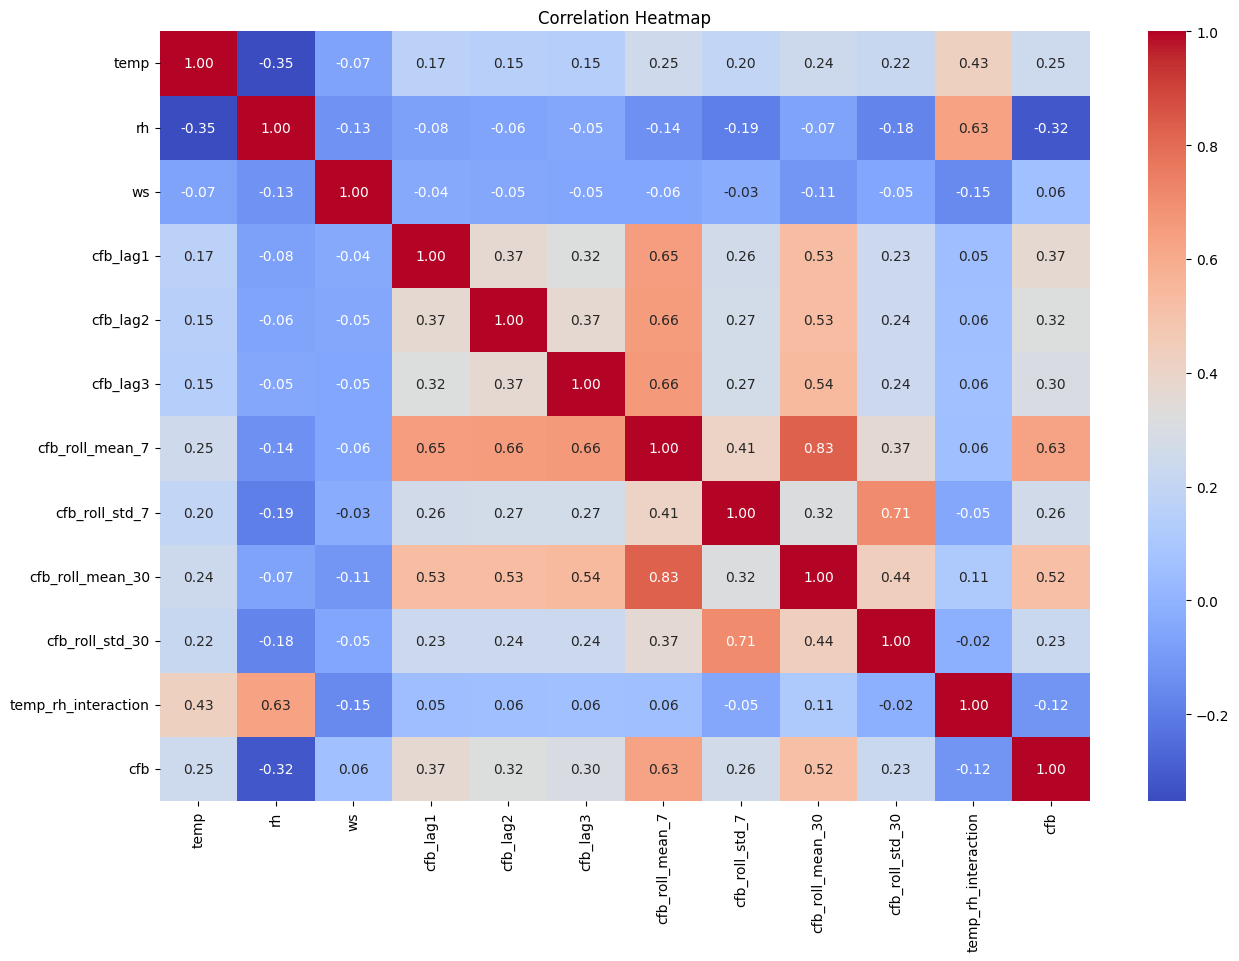

In [77]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(geo_wfp[relevant_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Analysis:

Temperature (temp):
Correlation with CFB: Positive correlation of 0.25, indicating that as temperature increases, CFB tends to increase.
Correlation with RH: Negative correlation of -0.35, suggesting that higher temperatures are often associated with lower relative humidity.

Relative Humidity (rh):
Correlation with CFB: Negative correlation of -0.32, indicating that lower humidity levels are associated with higher CFB values.
Correlation with Temperature: As mentioned, there is a negative correlation with temperature.

Wind Speed (ws):
Correlation with CFB: Weak positive correlation of 0.06, indicating minimal direct impact on CFB.

Lag Features (cfb_lag1, cfb_lag2, cfb_lag3):
Correlation with CFB: Positive correlations (0.37, 0.32, 0.30), indicating that previous CFB values are good predictors of current CFB values.
Inter-Correlation: Strong inter-correlation among lag features, especially between adjacent lags.

Rolling Mean Features (cfb_roll_mean_7, cfb_roll_mean_30):
Correlation with CFB: Strong positive correlations (0.63 and 0.52 respectively). These features effectively capture the trend and are important for forecasting.

Rolling Standard Deviation Features (cfb_roll_std_7, cfb_roll_std_30):
Correlation with CFB: Moderate correlations (0.26 and 0.23), suggesting that variability over these periods has some predictive power.

Interaction Feature (temp_rh_interaction):
Correlation with CFB: Weak negative correlation (-0.12), indicating that the interaction between temperature and humidity has a small inverse relationship with CFB.
Correlation with Individual Features: Strong positive correlation with temperature (0.43) and relative humidity (0.63), as expected from the interaction.

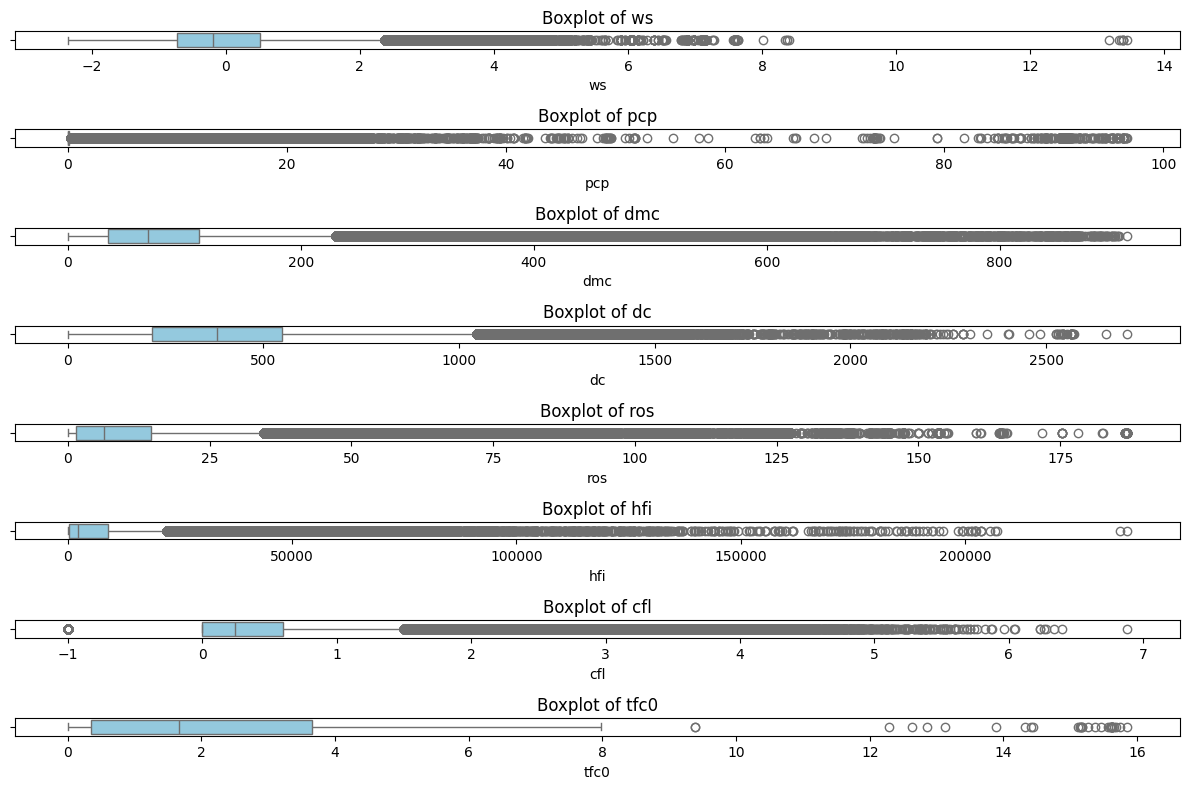

In [78]:
# Boxplots of significant features
columns_to_visualize = ['ws', 'pcp', 'dmc', 'dc', 'ros', 'hfi', 'cfl', 'tfc0']

fig, axes = plt.subplots(len(columns_to_visualize), 1, figsize=(12, 8))
for i, column in enumerate(columns_to_visualize):
    sns.boxplot(x=geo_wfp[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Wind Speed (ws): Directly influences fire spread.
Precipitation (pcp): Affects fuel moisture and ignition likelihood.
Duff Moisture Code (dmc): Indicates moisture content in organic materials.
Drought Code (dc): Long-term indicator of dry conditions.
Rate of Spread (ros): Critical for understanding fire dynamics.
Head Fire Intensity (hfi): Measures energy release from the fire.
Crown Fraction Burned (cfl): Assesses impact on forest structure.
Total Fuel Consumption (tfc0): Provides insights into fire intensity.

In [79]:
# Create a 'year_month' column for grouping
geo_wfp['year_month'] = geo_wfp['year'].astype(str) + '-' + geo_wfp['month'].astype(str)

In [80]:
# Calculate the mean 'cfb' for each 'year_month'
monthly_avg_cfb = geo_wfp.groupby('year_month')['cfb'].mean()

In [81]:
# Generate all month labels
all_months = pd.date_range(start='2020-01-01', end='2023-12-31', freq='M').strftime('%Y-%m')

C:\Users\mariajessa\AppData\Local\Temp\ipykernel_24392\479446244.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_months = pd.date_range(start='2020-01-01', end='2023-12-31', freq='M').strftime('%Y-%m')


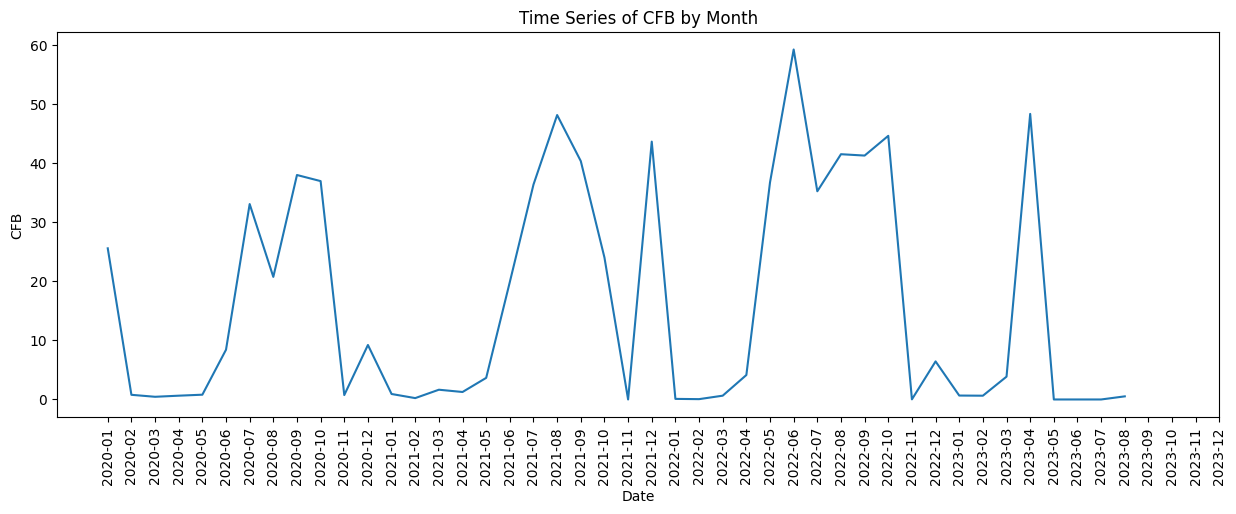

In [82]:
# Plot the time series
plt.figure(figsize=(15, 5))
monthly_avg_cfb.plot()
plt.title('Time Series of CFB by Month')
plt.xlabel('Date')
plt.ylabel('CFB')
plt.xticks(ticks=range(len(all_months)), labels=all_months, rotation=90)  # Set all month labels
plt.show()

Peaks during certain months, particularly in the summer (June, July). Indicates a seasonal trend where wildfires are more severe in summer months.

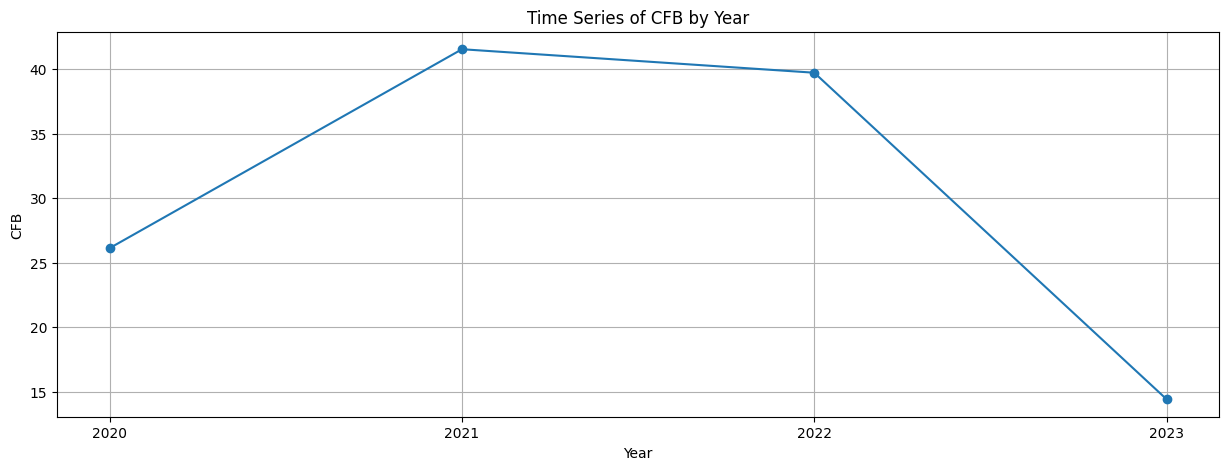

In [83]:
# Plot time series of CFB by year
plt.figure(figsize=(15, 5))
annual_avg_cfb = geo_wfp.groupby('year')['cfb'].mean().reset_index()
plt.plot(annual_avg_cfb['year'], annual_avg_cfb['cfb'], marker='o')
plt.title('Time Series of CFB by Year')
plt.xlabel('Year')
plt.ylabel('CFB')
plt.grid(True)
plt.xticks(annual_avg_cfb['year'])
plt.show()

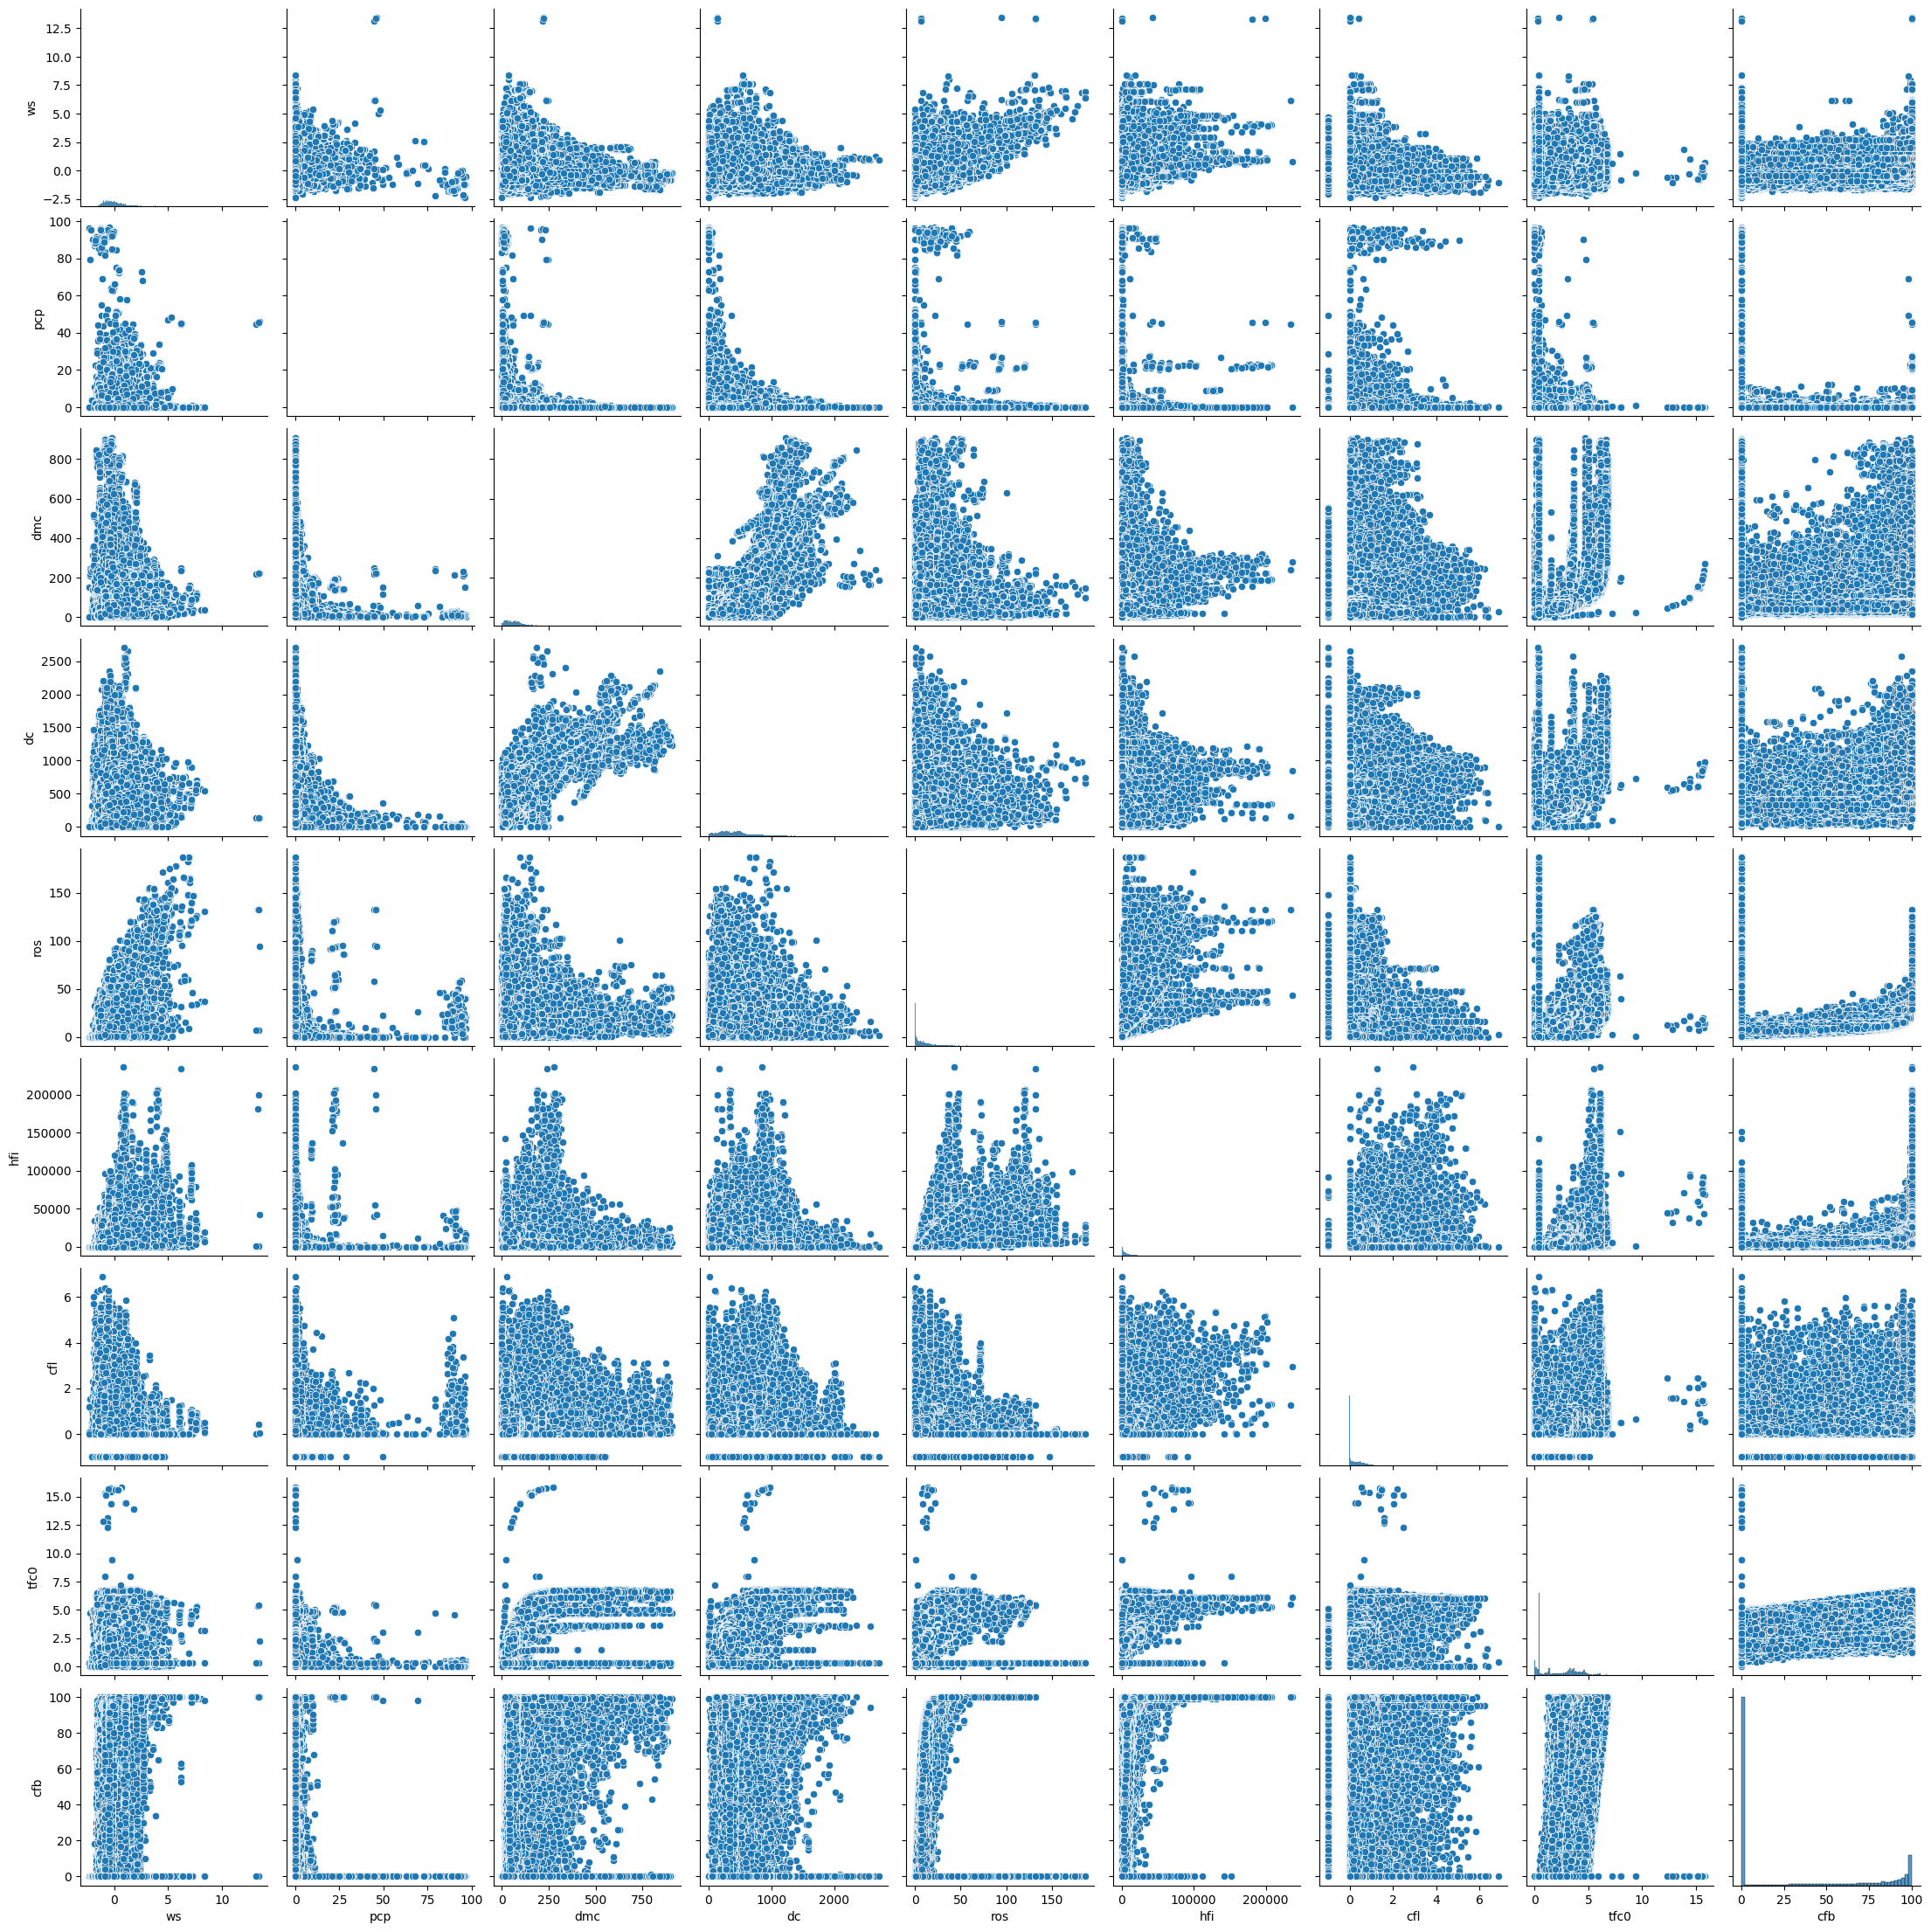

In [84]:
# Pairplot to visualize relationships between features and the target
sns.pairplot(geo_wfp, vars=columns_to_visualize + ['cfb'])
plt.show()

Temperature (temp) vs. cfb:

A positive relationship where higher temperatures generally correlate with higher cfb values.
This confirms the importance of temperature in influencing wildfire severity.
Relative Humidity (rh) vs. cfb:

A negative relationship where lower humidity levels correlate with higher cfb values.
Highlights the role of dry conditions in exacerbating wildfires.
Wind Speed (ws) vs. cfb:

The relationship is less clear, with cfb values spread across different wind speeds.
Wind speed might have an indirect or situational impact rather than a direct one.
Drought Code (dc) vs. cfb:

Higher dc values (indicating severe drought conditions) show a spread across higher cfb values.
Suggests that drought conditions contribute significantly to wildfire severity.
Rate of Spread (ros) vs. cfb:

Positive correlation where higher ros values (faster spreading fires) are associated with higher cfb values.
Indicates that fast-spreading fires are likely more severe.
Historical Fire Data (Lag Features) vs. cfb:

Positive correlations with previous cfb values, particularly cfb_lag1, cfb_lag2, and cfb_lag3.
Shows the importance of historical fire activity in predicting current fire severity.
Rolling Statistics:

cfb_roll_mean_7 and cfb_roll_mean_30 show strong positive correlations with cfb.
Indicates that smoothed trends over time are valuable predictors of current fire severity.

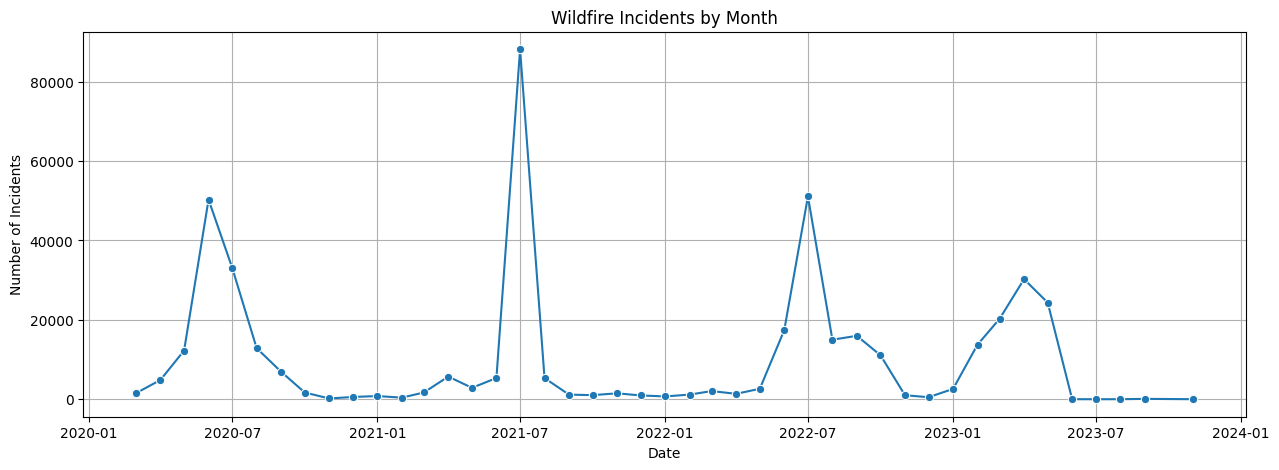

In [85]:
# Wildfire Incidents by Month
monthly_incidents = geo_wfp.groupby(['year', 'month']).size().reset_index(name='count')
monthly_incidents['date'] = pd.to_datetime(monthly_incidents[['year', 'month']].assign(day=1))

plt.figure(figsize=(15, 5))
sns.lineplot(x='date', y='count', data=monthly_incidents, marker='o')
plt.title('Wildfire Incidents by Month')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

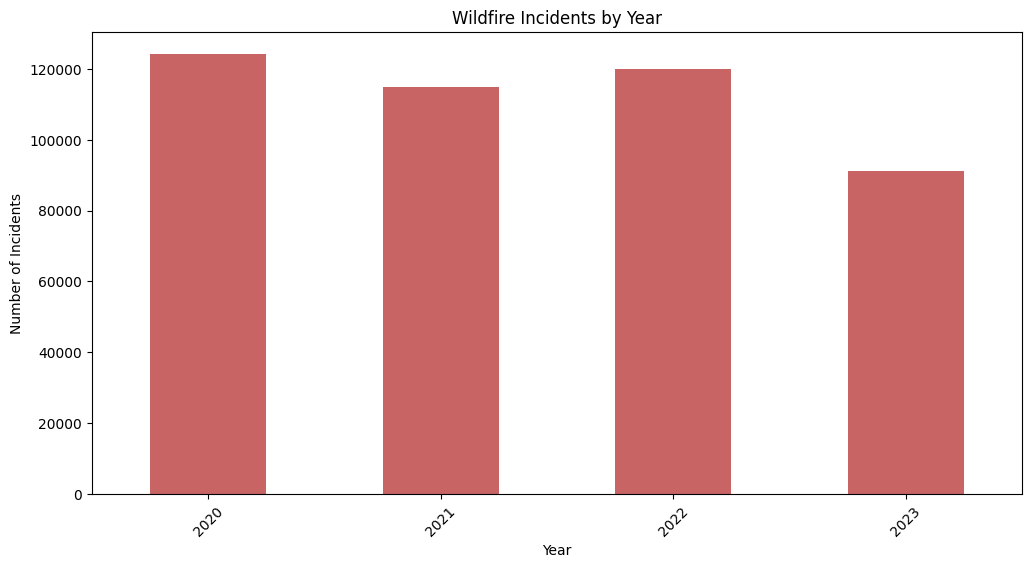

In [86]:
# Group the data by year and count the number of incidents per year
wildfire_incidents_by_year = geo_wfp.groupby('year').size()

# Plot the yearly count of wildfire incidents
plt.figure(figsize=(12, 6))
wildfire_incidents_by_year.plot(kind='bar', color='firebrick', alpha=0.7)
plt.title('Wildfire Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

Based on these insights, the features below will help capture the temporal dependencies and environmental conditions influencing wildfire severity

1. Lag Features: cfb_lag1, cfb_lag2, cfb_lag3

2. Rolling Statistics: cfb_roll_mean_7, cfb_roll_mean_30

3. Weather Variables: temp, rh, ws

4. Interaction Terms: temp_rh_interaction

5. Time-Based Features: year, month, day, dayofweek, weekofyear

6. Encoded Categorical Variables: Encoded fuel, ecozone, and agency


# Features to Keep
Target Variable: cfb (to predict the wildfire severity)

Time-based Features:
year
month
day

Weather Conditions:
temp (Temperature)
rh (Relative Humidity)
ws (Wind Speed)
pcp (Precipitation)

Fire Weather Index System Components:
ffmc (Fine Fuel Moisture Code)
dmc (Duff Moisture Code)
dc (Drought Code)
isi (Initial Spread Index)
bui (Build-Up Index)
fwi (Fire Weather Index)

Topography and Vegetation:
elev (Elevation)
sfc (Surface Fuel Consumption)
tfc (Total Fuel Consumption)
sfc0 (Surface Fuel Consumption at Initial Spread)
cfl (Crown Fraction Burned)
tfc0 (Total Fuel Consumption at Initial Spread)

Latitude and Longitude (Cyclical Encoding):
lat_sin, lat_cos, lon_sin, lon_cos

# Features to Drop

agency

Categorical Variables After Encoding:
Original fuel, ecozone columns after encoding

Geospatial Data:
Original lat, lon

Lag Features and Rolling Statistics:
cfb_lag1, cfb_lag2, cfb_lag3
cfb_roll_mean_7, cfb_roll_std_7, cfb_roll_mean_30, cfb_roll_std_30

temp_rh_interaction

dayofweek
weekofyear

In [87]:
# Define the columns to drop based on the current DataFrame
columns_to_drop_final = [
    'fuel_C2', 'fuel_C3', 'fuel_C4', 'fuel_C5', 'fuel_C6', 'fuel_C7', 'fuel_D1',
    'fuel_D2', 'fuel_M1_25', 'fuel_M1_35', 'fuel_M1_50', 'fuel_M1_65',
    'fuel_M1_75', 'fuel_M2_25', 'fuel_M2_35', 'fuel_M2_50', 'fuel_M2_65',
    'fuel_M2_75', 'fuel_O1a', 'fuel_O1b', 'fuel_S1', 'fuel_S2', 'fuel_bog',
    'fuel_farm', 'fuel_low_veg', 'fuel_non_fuel', 'fuel_unknown',
    'fuel_urban', 'fuel_water', 'ecozone_1', 'ecozone_10', 'ecozone_11',
    'ecozone_12', 'ecozone_13', 'ecozone_14', 'ecozone_15', 'ecozone_2',
    'ecozone_3', 'ecozone_4', 'ecozone_5', 'ecozone_5a', 'ecozone_5b',
    'ecozone_6', 'ecozone_6a', 'ecozone_6b', 'ecozone_7', 'ecozone_8',
    'ecozone_9', 'geometry', 'agency', 'fuel', 'ecozone', 'cfb_lag1', 'cfb_lag2', 'cfb_lag3',
    'cfb_roll_mean_7', 'cfb_roll_std_7', 'cfb_roll_mean_30', 'cfb_roll_std_30',
    'temp_rh_interaction', 'dayofweek', 'weekofyear'
]

# Filter the list to only include columns that exist in the DataFrame
columns_to_drop_final = [col for col in columns_to_drop_final if col in geo_wfp.columns]

# Drop the redundant or irrelevant features
geo_wfp.drop(columns=columns_to_drop_final, inplace=True)

In [88]:
# Print the final columns of the DataFrame
print("Final columns of the DataFrame:")
print(geo_wfp.columns)

Final columns of the DataFrame:
Index(['temp', 'rh', 'ws', 'wd', 'pcp', 'ffmc', 'dmc', 'dc', 'isi', 'bui',
       'fwi', 'ros', 'sfc', 'tfc', 'bfc', 'hfi', 'cfb', 'pcuring', 'greenup',
       'elev', 'sfl', 'cfl', 'tfc0', 'sfc0', 'year', 'month', 'day', 'lat_sin',
       'lat_cos', 'lon_sin', 'lon_cos', 'year_month'],
      dtype='object')


In [89]:
geo_wfp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 450342 entries, 0 to 450341
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   temp        450342 non-null  float64
 1   rh          450342 non-null  float64
 2   ws          450342 non-null  float64
 3   wd          450342 non-null  int64  
 4   pcp         450342 non-null  float64
 5   ffmc        450342 non-null  float64
 6   dmc         450342 non-null  float64
 7   dc          450342 non-null  float64
 8   isi         450342 non-null  float64
 9   bui         450342 non-null  float64
 10  fwi         450342 non-null  float64
 11  ros         450339 non-null  float64
 12  sfc         450339 non-null  float64
 13  tfc         450339 non-null  float64
 14  bfc         239132 non-null  float64
 15  hfi         450339 non-null  float64
 16  cfb         450339 non-null  float64
 17  pcuring     425990 non-null  float64
 18  greenup     425990 non-null  float64

In [90]:
# Save the final DataFrame to CSV
geo_wfp.to_csv(r'C:\Users\mariajessa\Lambton College\Big Data Capstone Project - General\engineered_wildfire_data.csv', index=False)
print("Final engineered data saved to CSV.")

Final engineered data saved to CSV.
